# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 23 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 23 октября, -4 балла после 06:00 30 октября, -6 баллов после 06:00 6 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (4 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения, использую timeit. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (2 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt
#import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1. Авилова Екатерина
2. Адаменко Павел
3. Акиньщиков Алексей
4. Афанасьева Анастасия
5. Балес Александр
6. Беляев Владимир
7. Беспалова Анастасия
8. Богомолов Эмиль
9. Боднарюк Василий
10. Бучкин Александр
11. Валинуров Денис
12. Волков Глеб
13. Голенков Кирилл
14. Горбушин Михаил
15. Димов Илья
16. Докшина Елизавета
17. Дорожинский Владислав
18. Жирнов Михаил
19. Жолковский Евгений
20. Зайдель Петр
21. Зимнюков Максим
22. Иванов Илья
23. Кашипов Артем
24. Комов Евгений
25. Кошман Дима
26. Кузнецова Екатерина
27. Кулагин Алексей
28. Лавреновъ Виталiй
29. Лебедь Федор
30. Лешков Михаил
31. Лозинский Иван
32. Лоскутов Антон
33. Лютов Владимир
34. Мажаров Иван
35. Манкевич Павел
36. Муравьев Никита
37. Находнов Максим
38. Оплачко Николай
39. Павлов Евгений
40. Петряйкин Федор
41. Рахматуллин Фарид
42. Секретарев Тихон
43. Сенюшкин Дмитрий
44. Серов Николай
45. Смирнов Александр
46. Соловьев Павел
47. Сомов Иван
48. Спиркин Роман
49. Терёшина Мария
50. Торбунова Екатерина
51. Тюгаев Антон
52. Фельдман Борис
53. Филин Максим
54. Фролов Михаил
55. Хохлов Олег
56. Черемнов Андрей
57. Шевцов Антон
58. Шурыгин Александр

In [3]:
N = 14# put your index here

In [4]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'DBSCAN. (параметры - epsilon, min_pts)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [3]:
## Задание 1
from sklearn.base import BaseEstimator, ClusterMixin

class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """
    
    def __init__(self, min_pts, eps):
        self.min_pts = min_pts
        self.eps = eps
        return
    
    def get_neighbours(self, point_index, PointsSet):
        result = []
        dist = cdist([PointsSet[point_index]], PointsSet, 'euclidean')[0]
        for index in range(0, PointsSet.shape[0]):
            if (dist[index] < self.eps and index != point_index):
                result.append(index)
        
        return result 
    
    def expand_cluster(self, point_index, point_ngb, used, PointsSet):
        # проставили у стартовой точки кластер новый
        self.clusters[point_index] = self.cluster_max
        
        # уже есть в списке соседей или нет
        is_ngb = {}
        for i in point_ngb:
            is_ngb[i] = True
        
        # проходимя по всем соседям
        for ngb_index in point_ngb:

            if (not used[ngb_index]):
                used[ngb_index] = True
                # берем соседей соседа
                ngb_of_ngb = self.get_neighbours(ngb_index, PointsSet)
                # если у него много соседей, то добавляем их всех в наш список
                if (len(ngb_of_ngb) >= self.min_pts):
                    for i in ngb_of_ngb:
                        if (not (i in is_ngb)):
                            is_ngb[i] = True
                            point_ngb.append(i)
                
            # если расмматриваемый сосед еще не помечен никем, то проставляем ему кластер новый
            if (self.clusters[ngb_index] == -1):
                self.clusters[ngb_index] = self.cluster_max
                
        # увеличиваем кол-во кластеров 
        self.cluster_max += 1
        
    def fit(self, x, y=None):
        self.x_len = len(x)
        
        # были ли мы в i-ой вершине
        used = np.zeros(x.shape[0], dtype=bool)
        
        # пометки кластеров для точек
        self.clusters = np.empty(x.shape[0], dtype=int)
        self.clusters.fill(-1)
        # максимальное кол-во найденных кластеров
        self.cluster_max = 0
        for index in range(0, x.shape[0]):
            if (used[index]):
                continue
            used[index] = True
            ngb = self.get_neighbours(index, x)
            # если соседей у текущей точки больше min_ptr
            if (len(ngb) >= self.min_pts):
                # то добавляем новый кластер
                self.expand_cluster(index, ngb, used, x)
            
        return self
    
    def predict(self, x):
        return [self.clusters[index] for index in xrange(self.x_len)]
    
    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

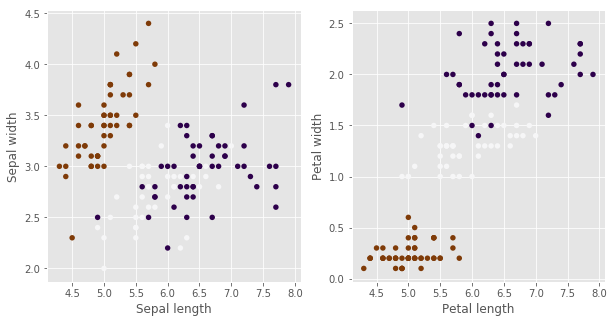

In [4]:
iris = ds.load_iris()

x_iris = iris.data[:150]
y_iris = iris.target[:150]
pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 0], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [5]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.4, min_samples=2).fit_predict(x_iris)
pred_iris = Clustering(eps=0.4, min_pts=2).fit_predict(x_iris)
print "my: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)
print "dbscan: %.2f" % smt.adjusted_rand_score(y_iris, db)

my: 0.71
dbscan: 0.70


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [35]:
## Задание 2
def quality_silhouette(x, y):
    """
    Silhouette
    """
    # общее кол-во точек
    n = float(len(y))
    # сколько всего кластеров
    clusters_n = 0
    # ответ
    res = 0
    
    # сколько точек в каждом кластере
    points_in_cluster = {}
    
    # посчитаем сколько у нас всего кластеров и посчитаем сколько точек в каждом кластере
    for cluster_id in y:
        clusters_n = max(clusters_n, cluster_id)
        if (cluster_id in points_in_cluster):
            points_in_cluster[cluster_id] += 1
        else:
            points_in_cluster[cluster_id] = 1
    clusters_n += 1

    for index in range(len(x)):
        # пропускаем шумы
        if (y[index] == -1):
            n -= 1
            continue
        
        # для каждой точки, считаем все средние суммы
        mid_sum = {}
        for i in range(clusters_n):
            mid_sum[i] = 0
        # посчитаем расстояние от текущей точки до остальных
        dist = cdist([x[index]], x, 'euclidean')[0]
        
        for point_index, cluster_id in enumerate(y):
            # если текущая точка - шум или наша точка, выходим
            if (cluster_id == -1 or point_index == index):
                continue
            # суммируем вклад в i-ый кластер
            mid_sum[cluster_id] += dist[point_index]
        
        # минимальное расстояние до другого кластера
        mini_from_other = 1e100;
        for cluster_id in mid_sum:
            #print cluster_id
            
            # считаем среднее арифмитеческое
            mid_sum[cluster_id] /= points_in_cluster[cluster_id]
            
            # если кластер не наш, пытаемся обновить минимум
            if (cluster_id != y[index]):
                mini_from_other = min(mini_from_other, mid_sum[cluster_id])
                
        if (mini_from_other != 1e100):
            # считаем Silhouette - (расстояние до ближайшего кластера - расстояние до нашего) / (их максимум)
            res += (mini_from_other - mid_sum[y[index]]) * 1.0 / max(mini_from_other, mid_sum[y[index]])

    # среднее арифмитеческое
    if (n == 0):
        return 0
    else :
        res /= n;
        return res

In [6]:
def quality(x, y):
    """
    Инерция
    """
    # сколько всего кластеров
    clusters_n = 0
    # ответ
    res = 0
    
    # сколько точек в каждом кластере
    points_in_cluster = {}
    
    # посчитаем сколько у нас всего кластеров и посчитаем сколько точек в каждом кластере
    for cluster_id in y:
        
        # пропускаем шумы
        if (cluster_id == -1):
            continue
        
        clusters_n = max(clusters_n, cluster_id)
        if (cluster_id in points_in_cluster):
            points_in_cluster[cluster_id] += 1
        else:
            points_in_cluster[cluster_id] = 1
    clusters_n += 1
    
    centroids = np.zeros(clusters_n, dtype=object)
    for index in range(len(x)):
        
        # пропускаем шумы
        if (y[index] == -1):
            continue
            
        centroids[y[index]] += np.array(x[index])

    for cluster_id in points_in_cluster:
        centroids[cluster_id] /= points_in_cluster[cluster_id]
    
    res = 0
    centroids = centroids.tolist()
    if (len(centroids) == 1):
        return -1
    for c in centroids:
        c = c.tolist()
    for index in range(len(x)):
        if (y[index] == -1):
            continue
        dist = cdist([x[index]], centroids, 'sqeuclidean')[0]
        mini_dist = 1e100
        for d in dist:
            mini_dist = min(mini_dist, d)
        res += mini_dist 

    return res

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

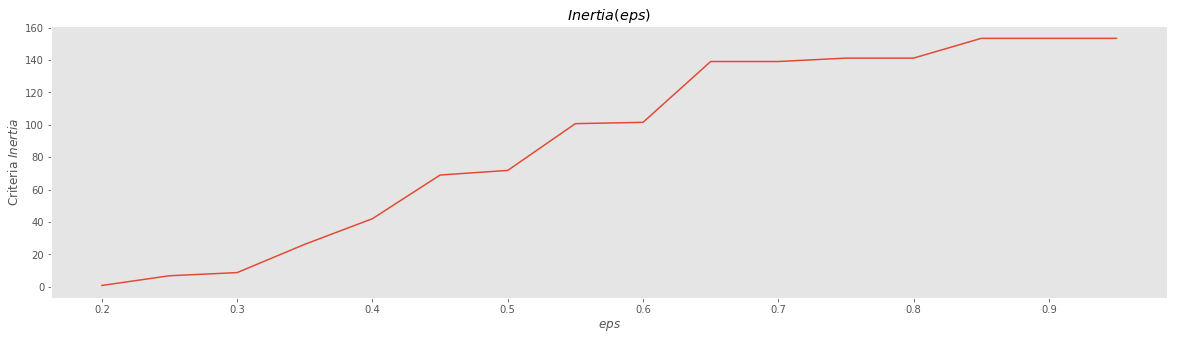

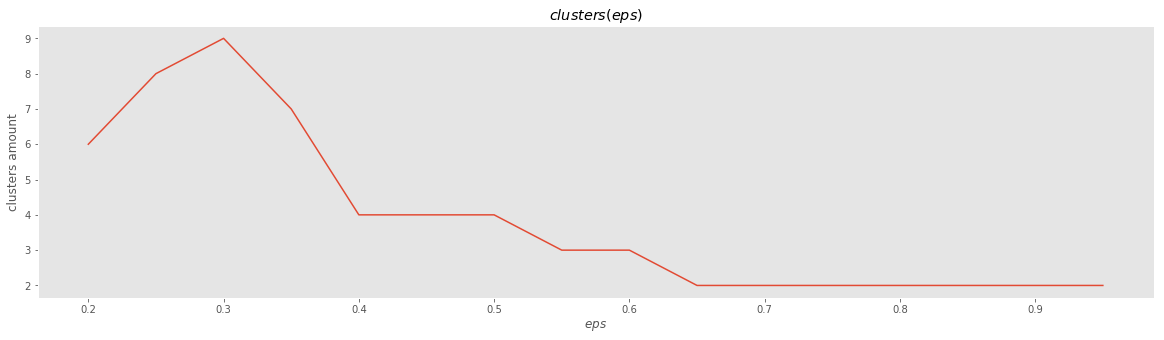

In [7]:
"""
Я изначально попробовал использовать Silhouette, но его результаты особо ничего не дали, поэтому использую инерцию.
По ее определению понятно, что чем меньше это значение, тем лучше, то есть все точки более менее сгруппированы, но
также понятно, что надо смотреть на кол-во кластеров, которые получаются, наш идеальный случай - 3 (я взял 3 клас-
тера из ириса)

Если брать два кластера, то с первыми взятыми из головы константами (eps = 1, min_pts=5) уже выдает 1. Поэтому
я попробовал что-то сделать с тремя

Анализ графиков:
    Рассмотрим график инерции. Если смотреть на инерцию при eps > 0.6, то там получаются большие числа, то есть 
    там это точно не подходит (мы же хотим этот критерий минимизировать). При маленьких eps < 0.4 у нас критерий
    принимает маленькие значения, оно и понятно, ибо образуется много кластеров (что видно на графике - Кол-во кла-
    cтеров(eps) ). По второму графику видно, что при eps > 0.5 образуется 3 кластера - как нам и надо, но по 
    первому графику при этих eps > 0.5 увеличивается критерий сильно, то есть качество плохое, таким образом хорошими
    остаются 0.4 < eps < 0.5. В результате, если посмотреть ARS от eps = 0.4, min_pts=2, мы получим качество: 0.71.
    
"""
ks = np.arange(0.2, 1, 0.05)
criteria = np.zeros(len(ks))
clusters = np.zeros(len(ks))

def clusters_amount(y):
    cluster_n = 0
    for i in y:
        cluster_n = max(i, cluster_n)
    return cluster_n + 1

for i, k in enumerate(ks):
    cls = Clustering(eps=k, min_pts=2)
    y_iris = cls.fit_predict(x_iris)
    criteria[i] = quality(x_iris, y_iris)
    clusters[i] = clusters_amount(y_iris)
    
    
pl.figure(figsize=(20, 5))
pl.plot(ks, criteria)
pl.title("$Inertia(eps)$")
pl.ylabel("Criteria $Inertia$")
pl.xlabel("$eps$")
pl.grid()
pl.show()

pl.figure(figsize=(20, 5))
pl.plot(ks, clusters)
pl.title("$clusters(eps)$")
pl.ylabel("clusters amount")
pl.xlabel("$eps$")
pl.grid()
pl.show()

In [60]:
## Задание 3
# у нас есть 264 страны и у каждой страны есть 1553 признака, каждому признаку ставится какая-то оценка
# у каждой страны и у каждого признака есть свои индикаторы
country = pd.read_csv("/Users/m.gorbushin/tech/spheremailru/hw2-clusters/WDI_csv/WDIData.csv")
country

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.283193e+01,8.347462e+01,8.400608e+01,8.441615e+01,8.473457e+01,8.500364e+01,8.524497e+01,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.504225e+01,8.465534e+01,8.595535e+01,8.639231e+01,8.684697e+01,8.760496e+01,8.803912e+01,NaN,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.229232e+01,7.176534e+01,7.373427e+01,7.450072e+01,7.521850e+01,7.671225e+01,7.740727e+01,NaN,NaN,NaN
5,Arab World,ARB,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.509408e+01,9.472336e+01,9.529989e+01,9.539420e+01,9.547506e+01,9.566886e+01,9.608860e+01,NaN,NaN,NaN
6,Arab World,ARB,Account (% age 15+) [ts],WP_time_10.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,Account at a financial institution (% age 15+),WP_time_01.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Arab World,ARB,"Account at a financial institution, female (% ...",WP_time_01.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Arab World,ARB,"Account at a financial institution, income, po...",WP_time_01.8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
country_list = country['Country Name'].unique()
fetures = country['Indicator Name'].unique()

In [177]:
# интерполяция
f_cnt = 1553
c_cnt = 264
for row in range(f_cnt * c_cnt):
        
    part = country.loc[row:, '1960']
    part.interpolate()
    country.loc[row:, '1960'] = part

"f_cnt = 1553\nc_cnt = 264\nfor row in range(f_cnt * c_cnt):\n        \n    part = country.loc[row:, '1960']\n    part.interpolate()\n    country.loc[row:, '1960'] = part"

In [8]:
"""
Загрузить нормальные данны с диска
"""

cut_by_year = []
for year in range(57):
    cut_by_year.append(pd.read_csv("ready_for_clustering/" + `year` + ".csv"))

X = dropped[0].values
cls = Clustering(eps=1, min_pts=2)
y = cls.fit_predict(X)
print y

In [219]:
"""
Для того, чтобы получить "нормальные" данные я:
1) интерполировал данные по годам у всех стран для каждого признака
2) сделал pivot table
3) заполнил оставшиеся nan - mean по column
4) нормализовал входные данные
"""
cut_by_year = []
for year in range(1960, 2017):
    tmp = country.pivot(index="Country Name", columns="Indicator Name", values=`year`)
    cut_by_year.append(tmp)
    tmp.to_csv("/Users/m.gorbushin/tech/spheremailru/hw2-clusters/ready_for_clustering/" + `year` + ".csv")

In [275]:
for year in range(57):
    for col in cut_by_year[year].columns:
        cut_by_year[year][col] = cut_by_year[year][col].fillna(cut_by_year[year][col].mean())

In [11]:
for year in range(57):
    for column in cut_by_year[year].columns:
        if (column == "Country Name"):
            continue
        mean = cut_by_year[year][column].mean()
        std = cut_by_year[year][column].std()
        cut_by_year[year][column] -= mean
        cut_by_year[year][column] /= std

In [87]:
dropped = []
for year in range(57):
    dropped.append(cut_by_year[year].drop("Country Name", 1))

In [53]:
for year in range(57):
    for col in dropped[year].columns:
        all_nan = 1
        for i in dropped[year][col]:
            if (not math.isnan(i)):
                all_nan = 0
                break
        if (all_nan):
            dropped[year] = dropped[year].drop(col, 1)

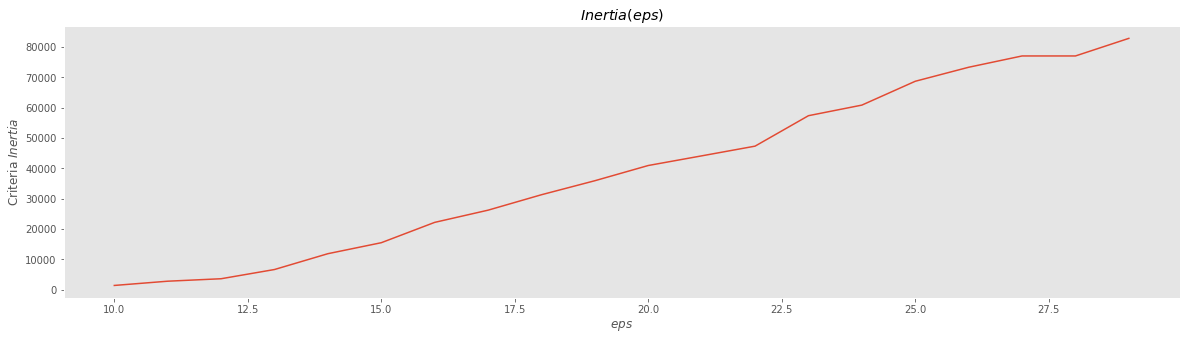

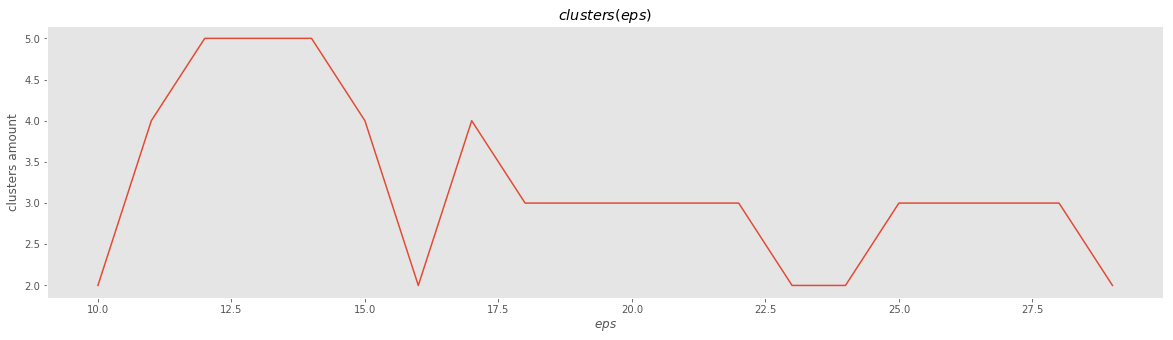

In [149]:
# будем анализировать 2016 год
X = dropped[56].values

ks = np.arange(10, 30, 1)
criteria = np.zeros(len(ks))
clusters = np.zeros(len(ks))

def clusters_amount(y):
    cluster_n = 0
    for i in y:
        cluster_n = max(i, cluster_n)
    return cluster_n + 1

for i, k in enumerate(ks):
    cls = Clustering(eps=k, min_pts=2)
    y = cls.fit_predict(X)
    criteria[i] = quality(X, y)
    clusters[i] = clusters_amount(y)
    
    
pl.figure(figsize=(20, 5))
pl.plot(ks, criteria)
pl.title("$Inertia(eps)$")
pl.ylabel("Criteria $Inertia$")
pl.xlabel("$eps$")
pl.grid()
pl.show()

pl.figure(figsize=(20, 5))
pl.plot(ks, clusters)
pl.title("$clusters(eps)$")
pl.ylabel("clusters amount")
pl.xlabel("$eps$")
pl.grid()
pl.show()

In [151]:
# по графику видно, что оптимальным eps будет 12.5, т.к. при нем хорошее кол-во кластеров и малое значение инерции
X = dropped[56].values
cls = Clustering(eps=12.5, min_pts=2)
y = cls.fit_predict(X)
cnt = 0
for i in y:
    if (i == -1):
        cnt += 1
print "not labled:" + `cnt`
print "all amount: " + `len(y)`
print "clusters amount: " + `clusters_amount(y)`
clusters = {}
i = 0
for cl_id in y:
    if (cl_id == -1):
        continue
    if (not cl_id in clusters):
        clusters[cl_id] = []
    clusters[cl_id].append(country_list[i])
    i += 1
    
print clusters

not labled:203
all amount: 264
clusters amount: 6
{0: ['Arab World', 'Caribbean small states', 'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (excluding high income)', 'East Asia & Pacific (IDA & IBRD countries)', 'Euro area', 'Europe & Central Asia', 'Europe & Central Asia (excluding high income)', 'Europe & Central Asia (IDA & IBRD countries)', 'Heavily indebted poor countries (HIPC)', 'High income', 'IDA & IBRD total', 'IDA blend', 'IDA only', 'Late-demographic dividend', 'Low income', 'Lower middle income', 'North America', 'Not classified', 'OECD members', 'Post-demographic dividend', 'Pre-demographic dividend', 'Small states', 'South Asia', 'South Asia (IDA & IBRD)', 'Sub-Saharan Africa (excluding high income)', 'Sub-Saharan Africa (IDA & IBRD countries)', 'Upper middle income', 'Afghanistan', 'Albania', 'American Samoa', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The'], 1: ['Central Europe and the Baltics', 'Other small states'

In [90]:
"""
Наиболее понятные из кластеров следующие:
5) - Африканские страны (Middle East & North Africa)
4) Менее чем другие развитые страны (Low & middle income, Least developed countries)
0) Большинство стран 0ого кластера - бедные (East Asia & Pacific (excluding high income), Heavily indebted poor countries 
   (HIPC), Lower middle income)
2) European Union + World можно предположить, что в этом кластере объеденились данные области, поскольку есть определенные показатели, 
   соответсвующие Европе и мир пытается им соответствовать 
"""

'\n\xd0\x9d\xd0\xb0\xd0\xb8\xd0\xb1\xd0\xbe\xd0\xbb\xd0\xb5\xd0\xb5 \xd0\xbf\xd0\xbe\xd0\xbd\xd1\x8f\xd1\x82\xd0\xbd\xd1\x8b\xd0\xb5 \xd0\xb8\xd0\xb7 \xd0\xba\xd0\xbb\xd0\xb0\xd1\x81\xd1\x82\xd0\xb5\xd1\x80\xd0\xbe\xd0\xb2 \xd1\x81\xd0\xbb\xd0\xb5\xd0\xb4\xd1\x83\xd1\x8e\xd1\x89\xd0\xb8\xd0\xb5:\n5) - \xd0\x90\xd1\x84\xd1\x80\xd0\xb8\xd0\xba\xd0\xb0\xd0\xbd\xd1\x81\xd0\xba\xd0\xb8\xd0\xb5 \xd1\x81\xd1\x82\xd1\x80\xd0\xb0\xd0\xbd\xd1\x8b (Middle East & North Africa)\n4) \xd0\x9c\xd0\xb5\xd0\xbd\xd0\xb5\xd0\xb5 \xd1\x87\xd0\xb5\xd0\xbc \xd0\xb4\xd1\x80\xd1\x83\xd0\xb3\xd0\xb8\xd0\xb5 \xd1\x80\xd0\xb0\xd0\xb7\xd0\xb2\xd0\xb8\xd1\x82\xd1\x8b\xd0\xb5 \xd1\x81\xd1\x82\xd1\x80\xd0\xb0\xd0\xbd\xd1\x8b (Low & middle income, Least developed countries)\n1) \xd0\x91\xd0\xbe\xd0\xbb\xd1\x8c\xd1\x88\xd0\xb8\xd0\xbd\xd1\x81\xd1\x82\xd0\xb2\xd0\xbe \xd1\x81\xd1\x82\xd1\x80\xd0\xb0\xd0\xbd 1\xd0\xbe\xd0\xb3\xd0\xbe \xd0\xba\xd0\xbb\xd0\xb0\xd1\x81\xd1\x82\xd0\xb5\xd1\x80\xd0\xb0 - \xd0\xb1\xd0\xb5\xd0\

In [ ]:
from sklearn.manifold import TSNE
tsne = np.array(X)
X_embedded = TSNE(n_components=2).fit_transform(tsne)

In [ ]:
ind = 0
colors = []
points = []
for cl_id in y:
    if (cl_id == -1):
        continue
    colors.append(cl_id + 1)
    points.append(X_embedded[ind].tolist())
    ind += 1
    
points = np.array(points)
plt.scatter(points[:, 0], points[:, 1], c=colors)